## Introduction: ##

In the vast landscape of fanfiction, the Harry Potter universe stands out with over 1 million fanfictions. Fanfiction allows writers to extend and transform established fictional worlds, creating new tales that may align with or diverge from the original canon. This paper addresses a challenging question: What are some of the differences in themes in canon versus non-canonical stories, and which variables explain the popularity of non-canonical stories?

### Research Topic and Question: ###
Canonical works, as those in the official books, movies, or television series, are set by the creators and typically follow a specific narrative structure, character development, and thematic focus. Non-canonical stories, or fanfics, creatively deviate from this canon to explore alternative situations, characters, and themes. This study will compare the thematic elements in canon and non-canon stories, examining how these themes are treated and received differently. The primary research question is: How are the themes different in canonical as opposed to non-canonical stories?

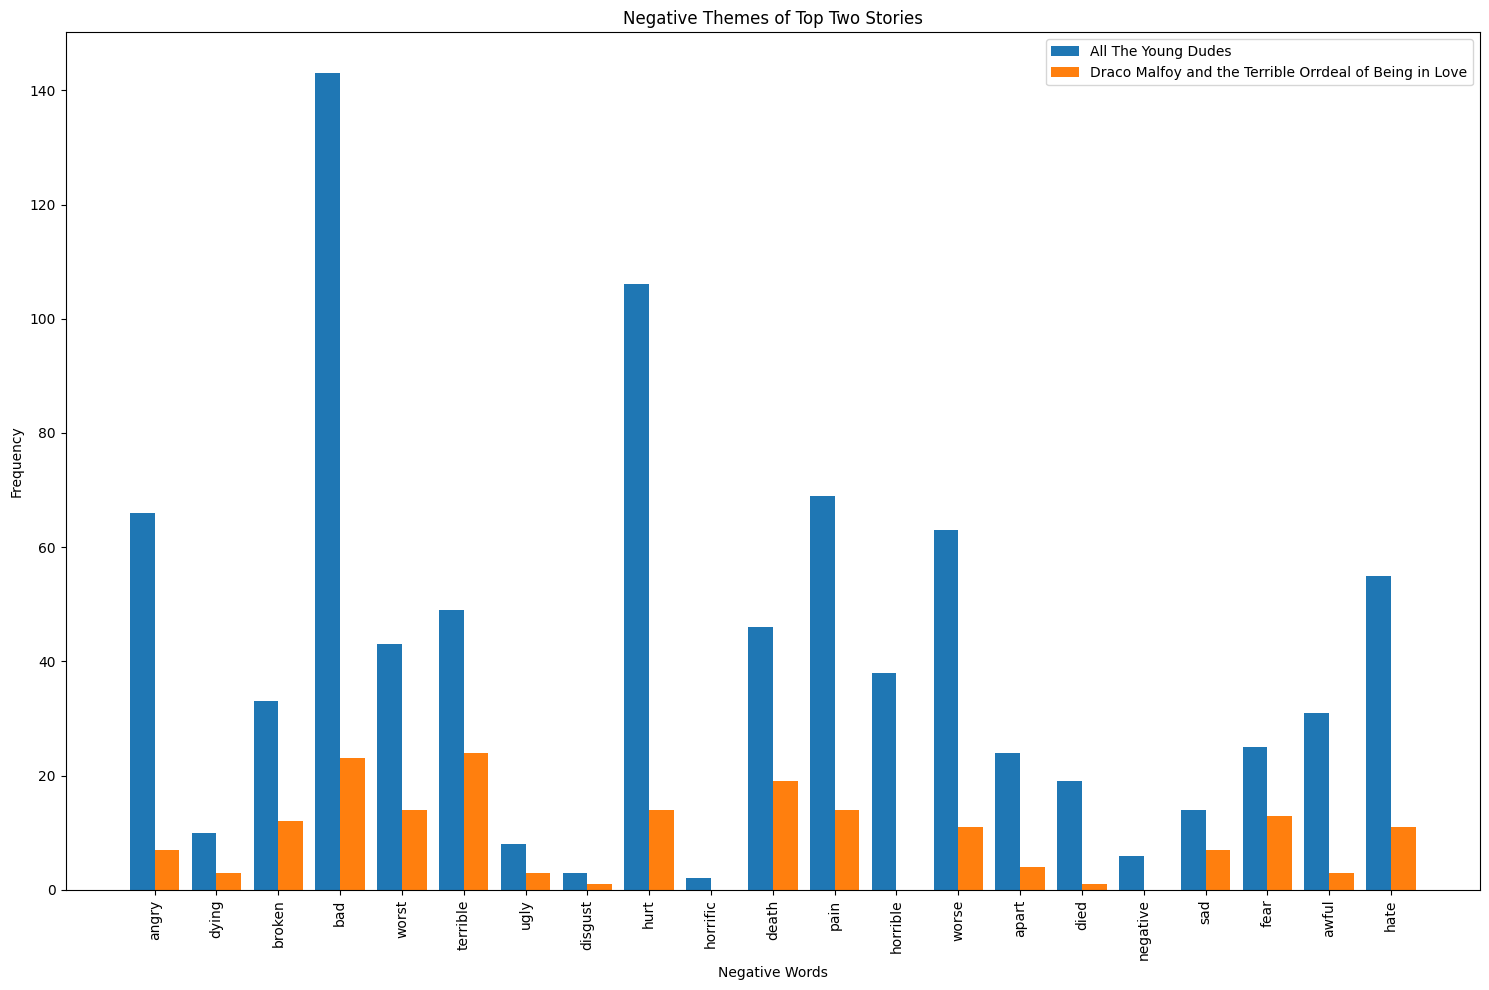

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'word': ['angry', 'dying', 'broken', 'bad', 'worst', 'terrible', 'ugly', 'disgust', 'hurt', 'horrific', 'death', 'pain', 'horrible', 'worse', 'apart', 'died', 'negative', 'sad', 'fear', 'awful', 'hate'],
    'All The Young Dudes': [66, 10, 33, 143, 43, 49, 8, 3, 106, 2, 46, 69, 38, 63, 24, 19, 6, 14, 25, 31, 55],
    'Draco Malfoy and the Terrible Orrdeal of Being in Love': [7, 3, 12, 23, 14, 24, 3, 1, 14, 0, 19, 14, 0, 11, 4, 1, 0, 7, 13, 3, 11]
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 10))
bar_width = 0.4
index = range(len(df))

plt.bar(index, df['All The Young Dudes'], bar_width, label='All The Young Dudes')

plt.bar([i + bar_width for i in index], df['Draco Malfoy and the Terrible Orrdeal of Being in Love'], bar_width, label='Draco Malfoy and the Terrible Orrdeal of Being in Love')

plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Negative Themes of Top Two Sto

ries')
plt.xticks([i + bar_width/2 for i in index], df['word'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

By webscraping and using Pandas we can evalaute the possible themes of the most read story in the canonical and non-canonical categories through sentimental analysis

**The conclusion showed that canon showed more negativity especially alongside themes of pain. The non canon one had a high disparity in the shared negative words with the highest being “terrible”. This leads to ideas that non-canon popularity is based on more idealistic and romanticized narratives that stray away from the original plotline.**

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


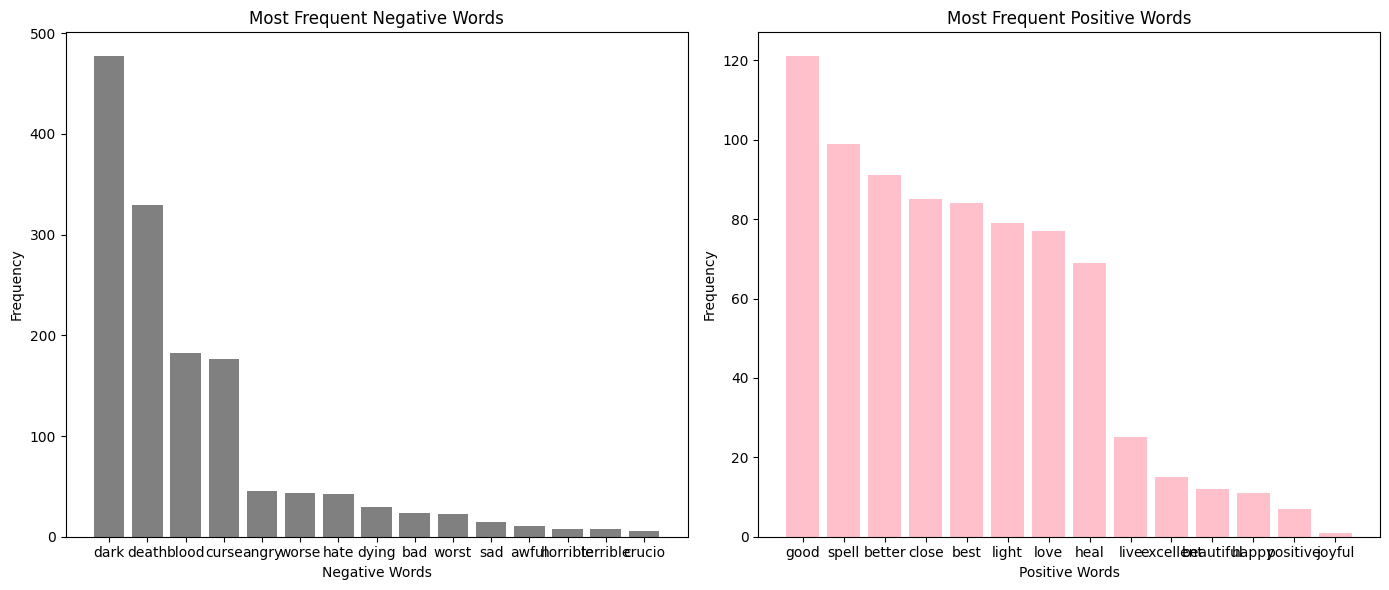

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

negative_words = set([
    'bad', 'worse', 'worst', 'awful', 'terrible', 'horrible', 'hate', 'angry', 'sad', 'depressing', 'excruciating', 'crucio','blood','death','dying','dark','curse'
])

positive_words = set([
    'good', 'better', 'best', 'wonderful', 'excellent', 'amazing', 'love', 'happy', 'joyful', 'positive','live','beautiful','close','light','heal','spell'
])

def preprocess_text(text):
    return [word.lower() for word in text.split() if word.lower() not in stop_words]

# Function to extract text from HTML file
def extract_text_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        return soup.get_text()

def count_words(text, words):
    word_list = preprocess_text(text)
    word_counter = Counter([word for word in word_list if word in words])
    return word_counter

file_path = 'Manacled.html'
story_text = extract_text_from_html(file_path)

negative_word_counts = count_words(story_text, negative_words)
positive_word_counts = count_words(story_text, positive_words)

df_negative = pd.DataFrame(negative_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_positive = pd.DataFrame(positive_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(df_negative['Word'], df_negative['Count'], color='gray')
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Negative Words')

plt.subplot(1, 2, 2)
plt.bar(df_positive['Word'], df_positive['Count'], color='pink')
plt.xlabel('Positive Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Positive Words')

plt.tight_layout()
plt.show()

once again analyzing the html files of the most popular story respective to non-canonical, we use NLTK to crtically assess possible themes in this category for sentimental analysis

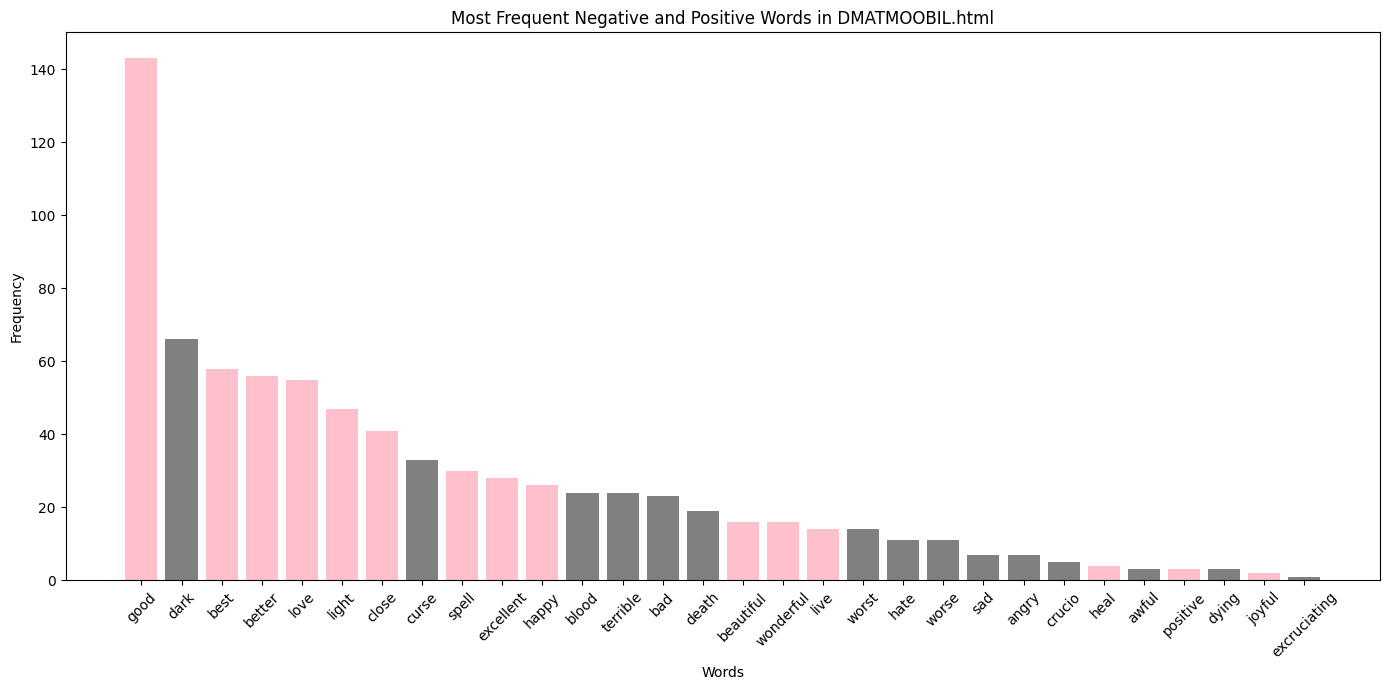

In [9]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from collections import Counter

negative_words = set([
    'bad', 'worse', 'worst', 'awful', 'terrible', 'horrible', 'hate', 'angry', 'sad', 'depressing', 
    'excruciating', 'crucio', 'blood', 'death', 'dying', 'dark', 'curse'
])

positive_words = set([
    'good', 'better', 'best', 'wonderful', 'excellent', 'amazing', 'love', 'happy', 'joyful', 'positive', 
    'live', 'beautiful', 'close', 'light', 'heal', 'spell'
])

def preprocess_text(text):
    return [word.lower() for word in text.split() if word.lower() not in stop_words]

def extract_text_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        return soup.get_text()

def count_words(text, words):
    word_list = preprocess_text(text)
    word_counter = Counter([word for word in word_list if word in words])
    return word_counter

file_path = 'Draco_Malfoy_and_the.html'
story_text = extract_text_from_html(file_path)

negative_word_counts = count_words(story_text, negative_words)
positive_word_counts = count_words(story_text, positive_words)

combined_counts = negative_word_counts + positive_word_counts
df_combined = pd.DataFrame(combined_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

colors = ['gray' if word in negative_words else 'pink' for word in df_combined['Word']]

plt.figure(figsize=(14, 7))
plt.bar(df_combined['Word'], df_combined['Count'], color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Negative and Positive Words in DMATMOOBIL.html')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Harry Potter: 0.4706
Hermione Granger: 0.3529
Draco Malfoy: 0.5882
Dolores Umbridge: 0.3529
Tom Riddle: 0.2353
Voldemort: 1.0000
Astoria Greengrass: 0.1176
Graham Montague: 0.5294
Severus Snape: 0.2353
Tonks: 0.6471
Moody: 0.6471
Lucius Malfoy: 0.2941
Dolohov: 0.3529
Bellatrix Lestrange: 0.2941
Lavender Brown: 0.0588
Padma Patil: 0.1176
Ginny Weasley: 0.2941
Ron Weasley: 0.2353


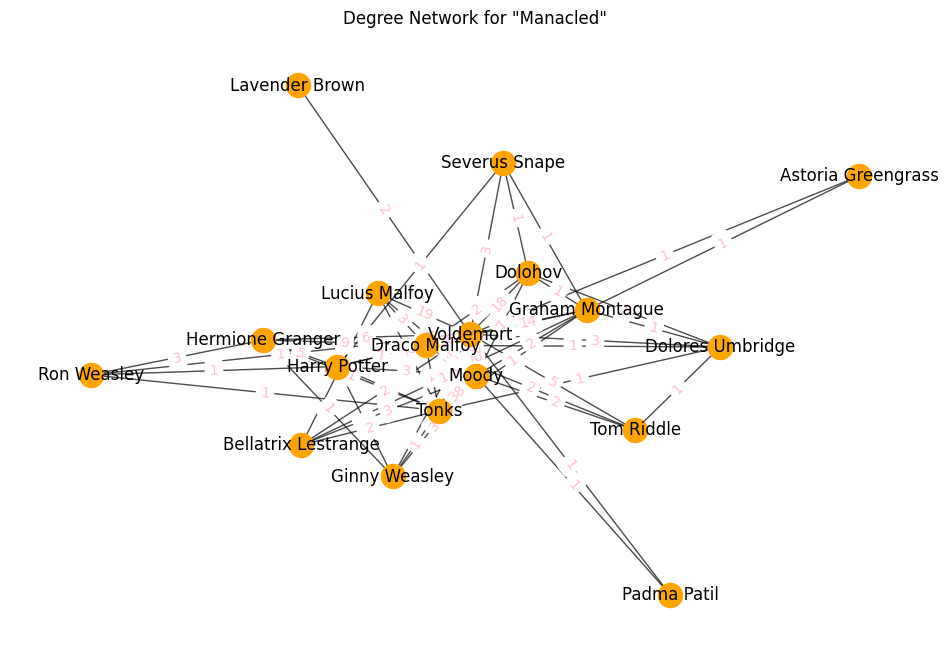

In [6]:
import re
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter

with open('Manacled.html', 'r', encoding='utf-8') as file:
    content = file.read()

soup = BeautifulSoup(content, 'html.parser')
text = soup.get_text()

characters = [
    "Hermione Granger", "Draco Malfoy", "Dolores Umbridge", "Tom Riddle", "Voldemort",
    "Astoria Greengrass", "Graham Montague", "Severus Snape", "Moody",
    "Harry Potter", "Ron Weasley", "Ginny Weasley", "Tonks", "Remus Lupin",
    "Bellatrix Lestrange", "Dolohov", "Rosier", "Lucius Malfoy", "Pansy Parkinson",
    "Padma Patil", "Lavender Brown"
]

char_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(char) for char in characters) + r')\b')

char_occurrences = char_pattern.findall(text)

interaction_pairs = [(char_occurrences[i], char_occurrences[i+1]) for i in range(len(char_occurrences)-1) if char_occurrences[i] != char_occurrences[i+1]]

interaction_counts = Counter(interaction_pairs)

G = nx.Graph()

for (char1, char2), weight in interaction_counts.items():
    if G.has_edge(char1, char2):
        G[char1][char2]['weight'] += weight
    else:
        G.add_edge(char1, char2, weight=weight)

degree_centrality = nx.degree_centrality(G)

for character, centrality in degree_centrality.items():
    print(f"{character}: {centrality:.4f}")

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='orange')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='pink')

plt.title('Degree Network for "Manacled"')
plt.axis('off')  
plt.show()

The focus on the two data sets above and below utlize degree centrality and social networks. These usually represent characters who have the most ties and/or interactions with other characters and often are highly influential.

Harry Potter: 0.6154
Sirius Black: 0.9231
Remus Lupin: 0.8462
James Potter: 0.6923
Peter Pettigrew: 0.6923
Severus Snape: 0.6154
Regulus Black: 0.6154
Voldemort: 0.7692
Moody: 0.9231
Lucius Malfoy: 0.2308
Tonks: 0.3077
Wormtail: 0.7692
Arthur Weasley: 0.5385
Dolohov: 0.0769


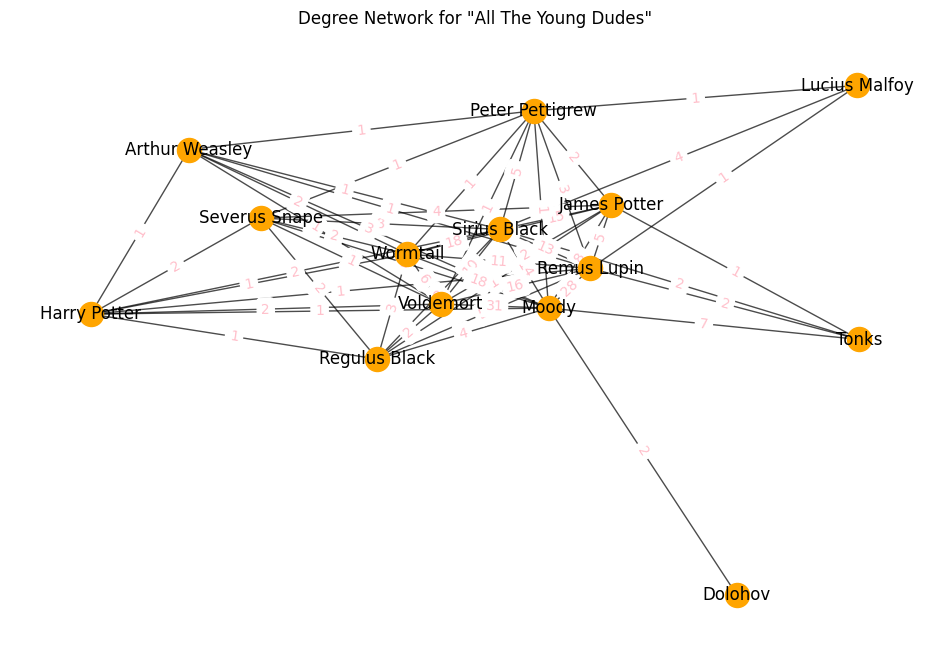

In [8]:
import re
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter

with open('All_the_Young_Dudes.html', 'r', encoding='utf-8') as file:
    content = file.read()

soup = BeautifulSoup(content, 'html.parser')
text = soup.get_text()

characters = [
  "lily", "James Potter", "Tom Riddle", "Voldemort",
    "Arthur Weasley", "Sirius Black", "Severus Snape", "Moody",
    "Harry Potter", "Ron Weasley", "Ginny Weasley", "Tonks", "Remus Lupin",
    "Bellatrix Lestrange", "Dolohov", "Rosier", "Lucius Malfoy", "Regulus Black",
    "Wormtail", "Peter Pettigrew"
]

char_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(char) for char in characters) + r')\b')

char_occurrences = char_pattern.findall(text)

interaction_pairs = [(char_occurrences[i], char_occurrences[i+1]) for i in range(len(char_occurrences)-1) if char_occurrences[i] != char_occurrences[i+1]]

interaction_counts = Counter(interaction_pairs)

G = nx.Graph()

for (char1, char2), weight in interaction_counts.items():
    if G.has_edge(char1, char2):
        G[char1][char2]['weight'] += weight
    else:
        G.add_edge(char1, char2, weight=weight)

degree_centrality = nx.degree_centrality(G)

for character, centrality in degree_centrality.items():
    print(f"{character}: {centrality:.4f}")

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='orange')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='pink')

plt.title('Degree Network for "All The Young Dudes"')
plt.axis('off')  
plt.show()

**The two plots are for stories that have darkers themes within them, also having characters with high degree centrality who more often than not carry negative dispositions.**

It can be seen that the canonical based story have a larger focus on male characters while non-canonical have a higher degree centraility on the male character who influence the plot and theme highly. It should be noted that there is a nuanced mix of narratives but a pattern of positivity lies with a herione being the main focus as in DMATMOOBIL. 